## Import Packages

In [11]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../utils")

from timeslots import timeslot_times
import utils_functions

## Import Optimal Data

In [12]:
group1_optimal = utils_functions.read_optimal_txt("../data/group1_results.txt")
group2_optimal = utils_functions.read_optimal_txt("../data/group2_results.txt")

In [13]:
# Map selected columns to number of occupied rooms.
num_members_to_rooms = {
  0: 0,
  6: 1,
  12: 2,
  18: 3,
  24: 4,
}

group1_rooms_used_per_timeslot = {}
for pattern in group1_optimal:
  group1_rooms_used_per_timeslot[pattern[0]] = num_members_to_rooms[sum(pattern[1])]

group2_rooms_used_per_timeslot = {}
for pattern in group2_optimal:
  group2_rooms_used_per_timeslot[pattern[0]] = num_members_to_rooms[sum(pattern[1])]

# Merge both dictionaries
rooms_per_timeslot = group1_rooms_used_per_timeslot.copy()
for key, value in group2_rooms_used_per_timeslot.items():
  if key in rooms_per_timeslot:
    rooms_per_timeslot[key] += value
  else:
    rooms_per_timeslot[key] = value
  if rooms_per_timeslot[key] > 4:
    print(f"ERROR! Overbooking in timeslot {key}")

print(dict(sorted((rooms_per_timeslot.items()))))

{1: 1, 2: 1, 3: 2, 4: 1, 7: 2, 8: 2, 9: 1, 10: 1, 11: 2, 12: 1, 16: 3, 17: 1, 19: 3, 21: 1, 22: 3, 24: 2, 25: 3, 26: 3, 27: 2, 28: 3, 29: 2, 30: 2, 31: 1, 32: 1, 33: 2, 34: 2, 35: 2, 36: 2, 37: 1, 38: 3, 41: 1, 43: 1, 44: 1, 45: 1, 46: 2, 47: 1, 50: 3, 51: 2, 52: 3, 53: 1, 56: 2, 59: 4, 60: 1, 61: 4, 62: 1, 63: 3, 64: 3, 67: 3, 68: 3, 69: 1, 70: 3, 71: 1, 72: 3, 74: 1, 75: 3, 76: 1, 77: 2, 80: 1, 81: 3, 84: 1, 85: 1, 87: 2, 89: 1, 90: 1, 91: 1, 92: 2, 93: 2, 94: 1, 95: 2, 96: 3, 97: 1, 98: 2, 99: 2, 100: 3, 101: 2, 102: 2, 103: 1, 104: 2, 105: 1, 106: 2, 108: 2, 109: 3, 111: 1, 112: 2, 113: 1, 114: 2, 118: 1, 120: 1, 123: 2, 124: 3, 125: 1, 126: 2, 127: 2, 128: 2, 129: 3, 130: 4, 131: 2, 132: 1, 133: 2, 134: 1, 135: 2, 136: 2, 137: 2, 138: 3, 139: 3, 140: 2, 143: 3, 144: 4, 146: 1, 147: 2, 149: 1, 152: 2, 153: 1, 154: 1, 155: 1, 157: 1, 159: 3, 160: 1, 161: 3, 162: 1, 163: 2, 164: 1, 165: 1, 166: 1, 167: 2, 168: 3, 170: 3}


## Display Master Schedule

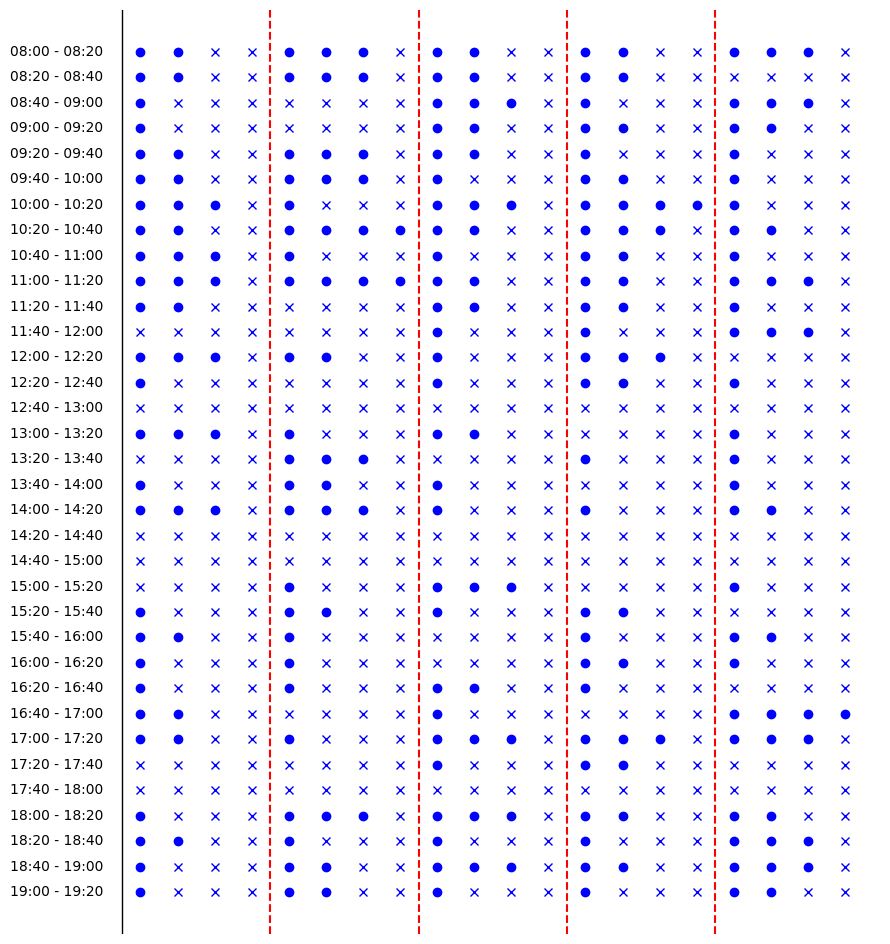

In [14]:
# Define the grid dimensions
rows = 34
cols = 20

plt.figure(1, (10, 12))
for i in range(cols):
  for j in range(rows):
    day = int(i/4)
    room = i%4+1
    timeslot = (j+1) + (day*rows)
    style = "bx"
    if timeslot in rooms_per_timeslot and rooms_per_timeslot[timeslot] >= room:
      style = "bo"
    plt.plot(i, j, style)

# Group columns into subsets of 4 and draw lines to separate the groups
for col in range(4, cols, 4):
    plt.axvline(x=col - 0.5, color='red', linestyle='--')

# Draw a vertical bar to separate labels from dots
plt.axvline(x=-0.5, color='black', linewidth=1)

# Add flipped labels to the rows (8:00 - 8:20 on the top)
for i, label in enumerate(reversed(timeslot_times)):
    plt.text(-1, i, label, va='center', ha='right')

plt.axis('off')

plt.savefig(f"../data/schedules/master_schedule.png", bbox_inches="tight")
plt.show()